Total samples: 53678
Unique authors: 45

Top 5 most represented authors:
author
8     6914
26    4441
14    2696
37    2387
45    2312
Name: count, dtype: int64

Top 5 least represented authors:
author
2     382
24    380
27    306
3     213
16    183
Name: count, dtype: int64

Average number of excerpts per author: 1192.84


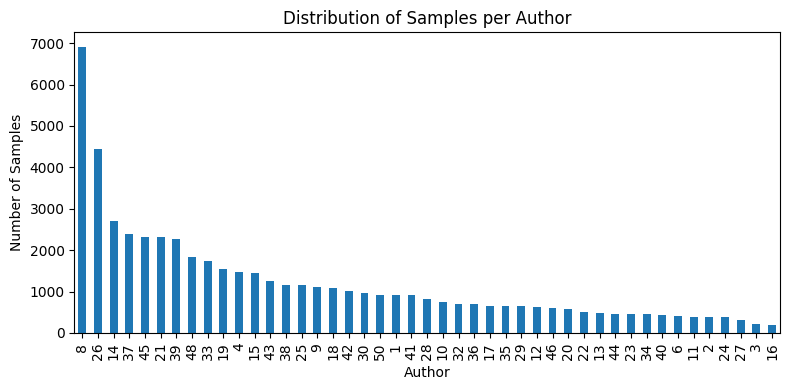


Average tokenized length: 1042.33
Minimum tokenized length: 1011
Maximum tokenized length: 1238


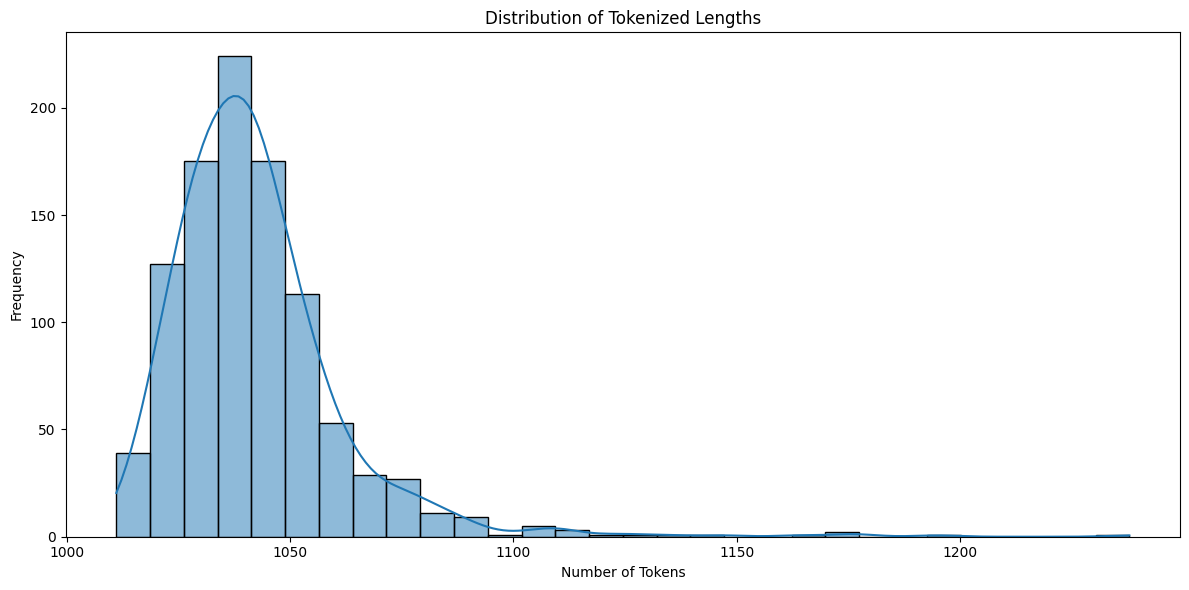


Number of samples >= 1000 tokens: 1000/1000
Percentage of samples >= 1000 tokens: 100.00%

Analysis complete.


In [5]:
# Dataset Analysis Notebook for Victorian Author Attribution Dataset

# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from transformers import AutoTokenizer

# Step 2: Load Dataset
df = pd.read_csv("data/Gungor_2018_VictorianAuthorAttribution_data-train.csv", encoding="ISO-8859-1")

# Step 3: Basic Stats
print(f"Total samples: {len(df)}")
unique_authors = df['author'].nunique()
print(f"Unique authors: {unique_authors}")

# Step 4: Author Distribution
author_counts = df['author'].value_counts()

print("\nTop 5 most represented authors:")
print(author_counts.head())

print("\nTop 5 least represented authors:")
print(author_counts.tail())

average_excerpts_per_author = author_counts.mean()
print(f"\nAverage number of excerpts per author: {average_excerpts_per_author:.2f}")

# Plot distribution
plt.figure(figsize=(8, 4))
author_counts.plot(kind='bar')
plt.title("Distribution of Samples per Author")
plt.xlabel("Author")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# Step 5: Token Length Analysis
model_name = "allenai/longformer-base-4096"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize first 1000 samples to save time (adjust if needed)
token_lengths = []

for text in df['text'].sample(n=1000, random_state=42):
    tokens = tokenizer(text, truncation=False, padding=False, add_special_tokens=False)
    token_lengths.append(len(tokens['input_ids']))

print(f"\nAverage tokenized length: {sum(token_lengths) / len(token_lengths):.2f}")
print(f"Minimum tokenized length: {min(token_lengths)}")
print(f"Maximum tokenized length: {max(token_lengths)}")

# Plot token length distribution
plt.figure(figsize=(12, 6))
sns.histplot(token_lengths, bins=30, kde=True)
plt.title("Distribution of Tokenized Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 6: Verify Claim about 1000 tokens
threshold = 1000
above_threshold = sum(1 for l in token_lengths if l >= threshold)
print(f"\nNumber of samples >= {threshold} tokens: {above_threshold}/{len(token_lengths)}")
print(f"Percentage of samples >= {threshold} tokens: {100 * above_threshold / len(token_lengths):.2f}%")

# Final Notes
print("\nAnalysis complete.")
